In [171]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [172]:
import os
import random
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: THS


In [173]:
image_name = random.choice(os.listdir("./test_images"))
image_path = f"./test_images/{image_name}"


img = cv2.imread(image_path)
original_height, original_width, _ = img.shape
print(f"Original image dimensions: {original_width}x{original_height}")


Original image dimensions: 3072x1394


pixel_data :  (40000, 3)


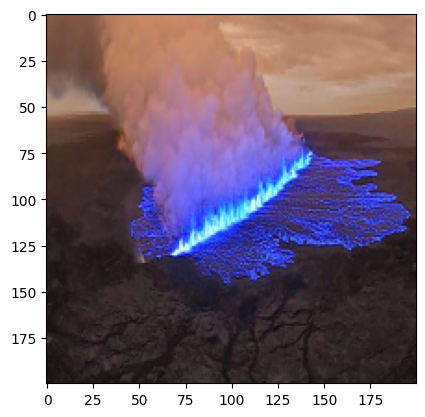

In [174]:
new_width = 200
new_height = 200

img_resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)
pixel_data = img_resized.reshape((-1, 3))

print(f"pixel_data : ",pixel_data.shape)
plt.imshow(img_resized)


In [175]:
# Perform K-means clustering

n_colors = 5
pixel_data = np.float32(pixel_data)
kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init='auto')
kmeans.fit(pixel_data)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [176]:
# Get the cluster labels for each pixel
labels = kmeans.labels_

# Get the new colors (centroids) for each cluster
new_colors = np.uint8(kmeans.cluster_centers_)
new_colors

array([[106,  74,  71],
       [117, 122, 227],
       [181, 132, 117],
       [ 57,  55, 170],
       [ 47,  36,  39]], dtype=uint8)

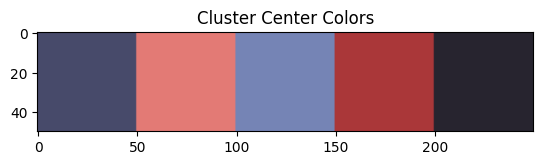

In [177]:
color_strip = np.zeros((50, 50 * n_colors, 3), dtype=np.uint8)
for i, color_bgr in enumerate(new_colors):
    # Convert BGR color to RGB for matplotlib display
    color_rgb = cv2.cvtColor(np.array([[color_bgr]]), cv2.COLOR_BGR2RGB)[0][0]
    color_strip[:, i*50:(i+1)*50, :] = color_rgb
plt.title("Cluster Center Colors")
plt.imshow(color_strip)
plt.show()

In [178]:
img_array = np.asarray(img_resized)
# Each pixel's original color is replaced by its cluster's centroid color
predicted_data = new_colors[labels]

print("sample predicted_data : ", predicted_data[:5])
print("predicted_data : ", predicted_data.shape)


quantized_image_data = predicted_data.reshape(img_array.shape)


        

sample predicted_data :  [[106  74  71]
 [106  74  71]
 [106  74  71]
 [106  74  71]
 [106  74  71]]
predicted_data :  (40000, 3)


In [179]:
img_display = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
quantized_image_display = cv2.cvtColor(quantized_image_data, cv2.COLOR_BGR2RGB)


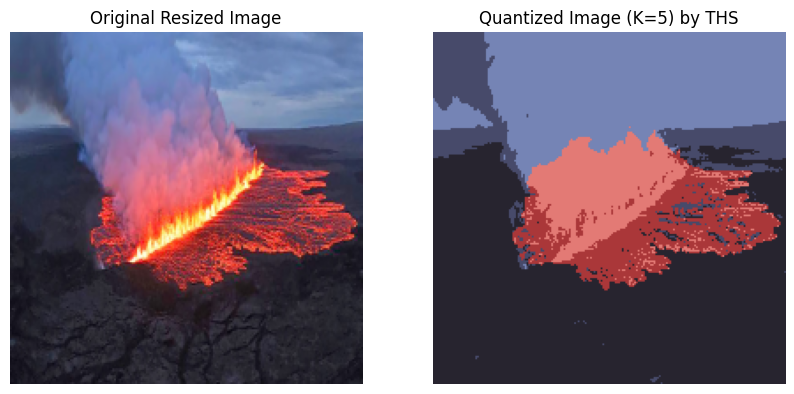

In [180]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_display)
plt.title("Original Resized Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(quantized_image_display)
plt.title(f"Quantized Image (K={n_colors}) by {ML_Summer_School_ID}")
plt.axis('off')
plt.show()